#**Load Dataset & Kamus**

In [ ]:
import pandas as pd

file = 'https://raw.githubusercontent.com/okkyibrohim/id-multi-label-hate-speech-and-abusive-language-detection/master/re_dataset.csv'
df = pd.read_csv(file, encoding='ISO-8859-1')

file2 = 'https://raw.githubusercontent.com/okkyibrohim/id-multi-label-hate-speech-and-abusive-language-detection/master/new_kamusalay.csv'
alay_dict = pd.read_csv(file2, encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})

Teks Data

In [ ]:
print("Shape: ", df.shape)
df.head(5)

Shape:  (13169, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
def show_pie(label, df, legend_title) :
    fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(round(pct/100.*np.sum(allvals)))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(df, autopct=lambda pct: func(pct, df), 
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))
    
    
    plt.setp(autotexts, size=10, weight="bold")
    ax.set_title("Perbandingan Label")
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


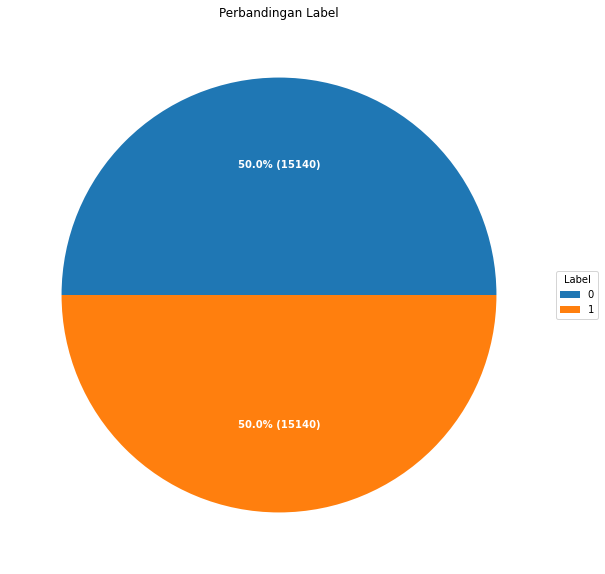

In [ ]:
HSlabel = df.HS.value_counts()
label = ['0', '1']
count_data = [HSlabel]


show_pie(label, count_data, "Label")

Alay Dict

In [ ]:
print("Shape: ", alay_dict.shape)
alay_dict.head(10)

Shape:  (15167, 2)


,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
5,aamiin,amin
6,aamiinn,amin
7,aamin,amin
8,aammiin,amin
9,abis,habis


# Teks Preprocessing

# Data Cleaning

In [ ]:
import re
def remove_unnecessary_char(text):
    url_regex = ('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+)||(http\S+))')
    emoticon_byte_regex = r'\s*(?:\\x[A-Fa-f0-9]{2})+'

    text = re.sub(url_regex, '', text) # Remove every url
    text = re.sub('@[\w\-]+', '', text) # Remove Mentions
    text = re.sub(' URL',' ',text) # Remove word URL
    text = re.sub(' url', ' ',text) # Remove word url
    text = re.sub(r'\\n',' ', text) # Remove every '\n' 
    text = re.sub('RT','', text) # Remove every retweet symbol
    text = re.sub('USER','', text) # Remove every user
    text = re.sub('\\+', ' ', text)
    text = re.sub(emoticon_byte_regex, '', text) # Remove emoticon bytes
    text = re.sub('[^0-9a-zA-Z]', ' ', text) #Remove punctuation
    text = re.sub(' +', ' ', text) # Remove extra spaces 
    text = re.sub('\s+', ' ', text)
    return text


# Example
text = 'RT USER: Ayoo jaga  keutuhan NKRI!!! Tangkap Penista 34634Agama!!! #StopKriminalisasiUlama https:\/\/t.co\/dxIDQ4ZQHV'
print("Example") 
print("before: ", text)
print("after : ", remove_unnecessary_char(text))


df['text'] = df['Tweet'].apply(remove_unnecessary_char)
df.text = df.text.str.strip()
df[['Tweet', 'text']].sample(10)

Example
before:  RT USER: Ayoo jaga  keutuhan NKRI!!! Tangkap Penista 34634Agama!!! #StopKriminalisasiUlama https:\/\/t.co\/dxIDQ4ZQHV
after :   Ayoo jaga keutuhan NKRI Tangkap Penista 34634Agama StopKriminalisasiUlama 


,Tweet,text
9042,Jika isu 5000 pucuk senjata BENAR maka saya sa...,Jika isu 5000 pucuk senjata BENAR maka saya sa...
4413,USER Dasar cebong!! semua digoreng akui aja pe...,Dasar cebong semua digoreng akui aja pemerinta...
10400,"Simak berita-berita ekonomi, bisnis, keuangan ...",Simak berita berita ekonomi bisnis keuangan da...
6691,USER USER suruh si munawar itu mimik kencing o...,suruh si munawar itu mimik kencing onta munawa...
3628,Demi apa di barel ada bom???? Sekarang wilayah...,Demi apa di barel ada bom Sekarang wilayah kam...
2163,USER Embun di pagi buta menebarkan bau basah d...,Embun di pagi buta menebarkan bau basah detik ...
9194,USER Malaysia Baru MILIK HARAPAN &amp; RAKYAT ...,Malaysia Baru MILIK HARAPAN amp RAKYAT yg meno...
11205,USER USER bola mata nya lumayan gede tapi bent...,bola mata nya lumayan gede tapi bentuk mata ny...
918,RT USER: USER jangan sampai Indonesia diambil ...,jangan sampai Indonesia diambil alih sama cina...
5569,KY Tdk berfungsi makan gaji buta habisin APBN ...,KY Tdk berfungsi makan gaji buta habisin APBN ...


# Case Folding

In [ ]:
# Lowercase letters
def lowercase(text):
  text = text.lower()
  return text
  
df['text'] = df['text'].apply(lowercase)
df[['Tweet', 'text']].head()

,Tweet,text
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,siapa yang telat ngasih tau elu edan sarap gue...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap percay...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku ku tau matamu sipit tapi diliat da...
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya dari...


# Normalization

In [ ]:
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])


df['text'] = df['text'].apply(normalize_alay)
df[['Tweet', 'text']].head()

,Tweet,text
0,- disaat semua cowok berusaha melacak perhatia...,di saat semua cowok berusaha melacak perhatian...
1,RT USER: USER siapa yang telat ngasih tau elu?...,siapa yang telat memberi tau kamu edan sarap g...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berpikir kenapa aku tetap percay...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku ku tau matamu sipit tapi dilihat d...
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kafir sudah kelihatan dongoknya da...


In [ ]:
def classify(hs):
    retval = ""
    if int(hs) == 1:
        retval = 'HS'
    else:
        retval = 'Non_HS'
    return retval

In [ ]:
df['hs_class'] = df['HS'].apply(classify)
df = df[['text', 'hs_class']]
df.to_csv('DatasetCleaned.csv', index = False)
df[['text', 'hs_class']].sample(10)

,text,hs_class
1753,jawa timur anti berita hoaks pilihan kepala da...,Non_HS
10288,susilo bambang yudhoyono lebih banyak utangnya...,HS
1116,gerombolan partai keadilan sejahtera masih bis...,Non_HS
4088,itulah salah satu propaganda kaum komunis gaya...,HS
12916,cebong tidak sunat nih pergi kamu ke septic ta...,HS
8525,mengurus diri sendiri saja belum tentu benar m...,HS
10930,mana enak begitu doang ngewe dong,Non_HS
6787,penggusuran paksa adalah pelanggaran berat ham...,Non_HS
8143,kerjanya membolak balik kan fakta yahudi musuh...,Non_HS
6167,2 nomer dua duanya indosat dan ada pulsanya ba...,HS


In [ ]:
df['hs_class'] = df['HS']
df = df[['text', 'hs_class']]
df.to_csv('DatasetCleaned.csv', index = False)
df[['text', 'hs_class']].sample(10)

,text,hs_class
3016,dan setelah blokir jokowi saya harap ada lengs...,1
6901,cebong mana mengerti,1
8,nah admin belanja satu lagi port terbaik nak m...,0
2884,prabowo terbukti terlibat kasus penculikan,1
7215,bom jiah,0
2824,menonton drama korea sambil ngentot ngewe meme...,0
11003,dulu banget ada tetapi karena memutuskan terju...,0
1871,pekerja seks komersial mengaku mahasiswi pasan...,0
12421,profil sekolah dasar negeri 1 tidore kepulauan...,0
5557,mana gue menghina agama lain haha otak model c...,1


In [ ]:
print("Shape: ", df.shape)

Shape:  (13169, 2)


In [ ]:
df = pd.read_csv('DatasetCleaned.csv')

df = df[df['text'].notna()]

print("Shape: ", df.shape)
df.head(10)

df.to_csv('DatasetUnbalanced.csv', index=False)

Shape:  (13123, 2)


In [ ]:
import pandas as pd
df = pd.read_csv('DatasetUnbalanced.csv')
df.shape

(13123, 2)

#**BALANCE DATASET**

In [ ]:
# df_balanced = [ df.loc[df.label == 0].sample(10), df.loc[df.lable == 1].sample(10) ]
df_class1 = df.loc[df.hs_class == 'HS']
size_class1 = df_class1.shape[0]
df_class0 = df.loc[df.hs_class == 'Non_HS'].sample(size_class1)

df_balanced = [df_class0, df_class1]
df = pd.concat(df_balanced)

df.to_csv('DatasetBalanced.csv', index = False)
# Report the number of sentences.
print('Number of balanced training sentences: {:,}\n'.format(df.shape[0]))

Number of balanced training sentences: 11,106



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


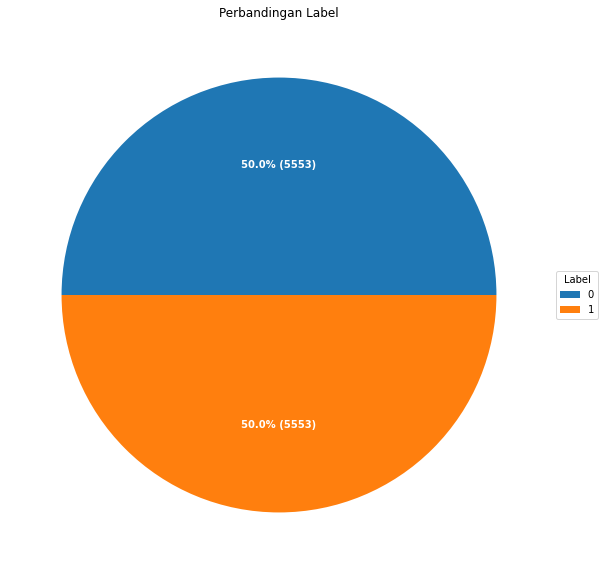

In [ ]:
hslabel = df.hs_class.value_counts()
label = ['0', '1']
count_data = [hslabel]

show_pie(label, count_data, "Label")

# **SPLIT DATASET**

In [ ]:
# Train Test valid Split dengan rasio 80% train, 10% test dan 10% valid
import numpy as np
import pandas as pd

df = pd.read_csv("DatasetAugmented.csv")

train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.8*len(df)), int(.9*len(df))])
              
train.to_csv('DataTrain.csv', index=False)
validate.to_csv('DataVal.csv', index=False)
test.to_csv('DataTest.csv', index=False)

In [ ]:
trainvalue = train.hs_class.value_counts()
validvalue = validate.hs_class.value_counts()
testvalue = test.hs_class.value_counts()

print(trainvalue)
print(validvalue)
print(testvalue)

HS        12196
Non_HS    12028
Name: hs_class, dtype: int64
Non_HS    1562
HS        1466
Name: hs_class, dtype: int64
Non_HS    1550
HS        1478
Name: hs_class, dtype: int64


#Stop Word & Stemming

In [ ]:
!pip install PySastrawi

     |████████████████████████████████| 210 kB 7.7 MB/s 


In [ ]:
import pandas as pd
id_stopword_dict = pd.read_csv('stopwordbahasa.csv', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})

In [ ]:
df = pd.read_csv('DatasetUnbalanced.csv')
df.head()

,text,hs_class
0,di saat semua cowok berusaha melacak perhatian...,HS
1,siapa yang telat memberi tau kamu edan sarap g...,Non_HS
2,41 kadang aku berpikir kenapa aku tetap percay...,Non_HS
3,aku itu aku ku tau matamu sipit tapi dilihat d...,Non_HS
4,kaum cebong kafir sudah kelihatan dongoknya da...,HS


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
import re
def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

df['text'] = df['text'].apply(remove_stopword)


In [ ]:
def stemming(text):
    return stemmer.stem(text)

df['text'] = df['text'].apply(stemming)

In [ ]:
df = df[['text', 'hs_class']]
df.to_csv('DatasetUnbalancedFP.csv', index = False)
df.sample(5)

,text,hs_class
10052,12 presiden harap skema kerja bangun bangun,Non_HS
2572,baca henti min 3 rasa pakai acid dosis rendah ...,Non_HS
1899,pokok balas partai silit hitam,HS
11778,indonesia tindak nyata usir duta myanmar indon...,HS
11921,berengsek,HS


In [ ]:
# Train Test valid Split dengan rasio 80% train, 10% test dan 10% valid
import numpy as np
import pandas as pd

df = pd.read_csv("DatasetUnbalancedFP.csv")

train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.8*len(df)), int(.9*len(df))])
              
train.to_csv('DataTrain.csv', index=False)
validate.to_csv('DataVal.csv', index=False)
test.to_csv('DataTest.csv', index=False)

In [ ]:
trainvalue = train.hs_class.value_counts()
validvalue = validate.hs_class.value_counts()
testvalue = test.hs_class.value_counts()

print(trainvalue)
print(validvalue)
print(testvalue)

Non_HS    6085
HS        4413
Name: hs_class, dtype: int64
Non_HS    735
HS        577
Name: hs_class, dtype: int64
Non_HS    750
HS        563
Name: hs_class, dtype: int64
